In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N_BINS = 20

In [3]:
# Can't import the src package without these lines
import sys
sys.path.append("..")

In [4]:
from src.d01_data.db import read_table

# 1. Read relevant tables into dataframes

* `measurement_abstract_rpt`: 1,568,350 final reported study measurements (more than measured because some are automatically calculated)
* `a_measgraphref`: 858,255 total recorded instance measurements
* `a_measgraphic`: 486,884 instance frames

In [5]:
measurement_abstract_rpt_df = read_table('measurement_abstract_rpt')
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568350, 6)


,row_id,studyid,measabstractnumber,name,value,unitname
0,1.0,2882.0,2.0,(P1/2t)AVM,2.491754,cm2
1,2.0,2882.0,12.0,Area TSVI,3.606348,cm2
2,3.0,2882.0,43.0,FE(el-ps4),37.032087,%
3,4.0,2882.0,46.0,FE(MDD-ps4),35.095355,%
4,5.0,2882.0,125.0,P1/2t VM,88.291224,ms


In [6]:
measgraphref_df = read_table('a_measgraphref')
print(measgraphref_df.shape)
measgraphref_df.head()

(858255, 11)


,row_id,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,1.0,2882.0,187.0,0.0,57164,0.0,28.242271,0.0,,,
1,2.0,2882.0,188.0,0.0,57164,0.0,7.897812,0.0,,,
2,3.0,2882.0,189.0,0.0,57164,0.0,85.725750,0.0,,,
3,4.0,2882.0,190.0,0.0,57164,0.0,87.190031,0.0,,,
4,5.0,2882.0,191.0,0.0,57164,1.0,36.654466,0.0,,,


In [7]:
# Drop bad instanceidk from dataframe
measgraphref_df = measgraphref_df[measgraphref_df["instanceidk"] != ""]
measgraphref_df = measgraphref_df[measgraphref_df["instanceidk"] != "-1"]

In [8]:
measgraphic_df = read_table('a_measgraphic')
print(measgraphic_df.shape)
measgraphic_df.head()

(486884, 9)


,row_id,instanceidk,indexinmglist,frame,graphictoolidk,longaxisindex,measidk,loopidk,instancerecordtype
0,1.0,57160.0,0.0,0.0,1.0,-1.0,0.0,0.0,False
1,2.0,57160.0,1.0,0.0,2.0,-1.0,0.0,0.0,False
2,3.0,57160.0,2.0,0.0,1.0,-1.0,0.0,0.0,False
3,4.0,57160.0,3.0,0.0,2.0,-1.0,0.0,0.0,False
4,5.0,57162.0,0.0,5.0,2.0,-1.0,0.0,0.0,False


# 2. Descriptive Statistics

* 24,912 unique studies with final reported measurements
* 24,471 unique studies with total recorded measurements (?)
* 254,168 unique instances with total recorded measurements

### What are the most/least common final reported measurements?

In [9]:
measurement_abstract_rpt_df['name'].value_counts()

ASC                                    22447
Altura (unidad métrica)                21505
Peso (unidad métrica)                  21478
IMC                                    21447
ASC (Haycock)                          21438
Vmáx V2 Ao                             20828
GP máx Ao                              20827
VTD(Teich)                             20623
DVItd                                  20623
VTD(cúbico)                            20613
SIVtd                                  20548
PPVItd                                 20430
DSIV/DPPVI                             20309
Masa VI(C)td                           20297
Vmáx E VM                              19978
Masa VI (C)ltd                         18560
Grosor relativo pared                  17856
Vmáx A VM                              17617
E/A VM                                 17581
VTD(MDD-ps4)                           17547
DVItd ap4                              17519
VTS(MDD-ps4)                           17239
FE(MDD-ps4

### How many unique final reported measurements are there?

In [10]:
len(measurement_abstract_rpt_df['name'].unique())

362

### What is the distribution of counts of final reported measurements?

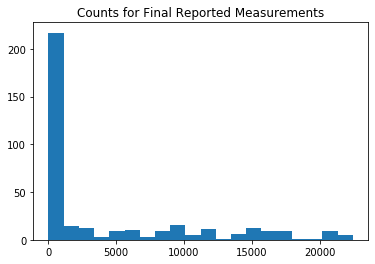

In [11]:
plt.title("Counts for Final Reported Measurements")
final_measurement_counts = measurement_abstract_rpt_df['name'].value_counts().values
plt.hist(final_measurement_counts, N_BINS);

### What is the distribution of counts of final reported measurements per study?

In [12]:
final_measurement_counts_per_study = measurement_abstract_rpt_df.groupby("studyid").count()['row_id']
len(final_measurement_counts_per_study)

24912

In [13]:
final_measurement_counts_per_study.head()

studyid
2882.0    27
2915.0    15
2965.0     5
2966.0    15
3009.0    11
Name: row_id, dtype: int64

In [14]:
final_measurement_counts_per_study.describe()

count    24912.000000
mean        62.955604
std         28.507135
min          1.000000
25%         42.000000
50%         60.000000
75%         84.000000
max        146.000000
Name: row_id, dtype: float64

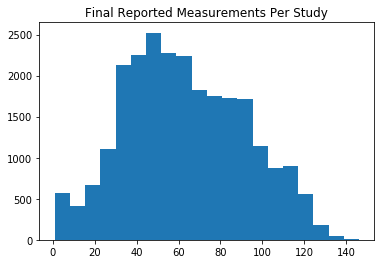

In [15]:
plt.title("Final Reported Measurements Per Study")
plt.hist(final_measurement_counts_per_study.values, N_BINS);

### What is the distribution of counts of total recorded measurements per study?

In [16]:
total_measurement_counts_per_study = measgraphref_df.groupby("studyidk").count()['row_id']
len(total_measurement_counts_per_study)

24471

In [17]:
total_measurement_counts_per_study.head()

studyidk
2882.0    20
2915.0     3
2965.0     5
2966.0    10
3009.0     2
Name: row_id, dtype: int64

In [18]:
total_measurement_counts_per_study.describe()

count    24471.000000
mean        33.669364
std         15.882676
min          1.000000
25%         22.000000
50%         33.000000
75%         44.000000
max        148.000000
Name: row_id, dtype: float64

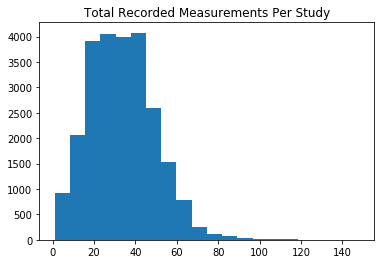

In [19]:
plt.title("Total Recorded Measurements Per Study")
plt.hist(total_measurement_counts_per_study.values, N_BINS);

### What is the distribution of counts of total recorded measurements per instance?

In [20]:
total_measurement_counts_per_instance = measgraphref_df.groupby("instanceidk").count()['row_id']
len(total_measurement_counts_per_instance)

254168

In [21]:
total_measurement_counts_per_instance.head()

instanceidk
1000006    3
1000009    4
1000011    1
1000012    1
1000031    8
Name: row_id, dtype: int64

In [22]:
total_measurement_counts_per_instance.describe()

count    254168.000000
mean          3.241647
std           2.723065
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          27.000000
Name: row_id, dtype: float64

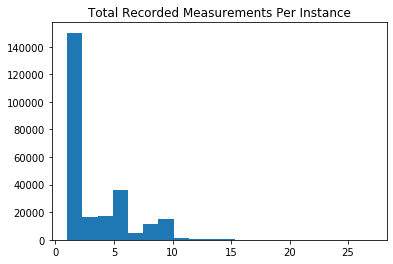

In [23]:
plt.title("Total Recorded Measurements Per Instance")
plt.hist(total_measurement_counts_per_instance.values, N_BINS);

### What is the distribution of counts of instances per study?

In [24]:
frame_counts_per_study_and_instance = measgraphref_df.groupby(["studyidk", "instanceidk"]).count()['row_id']
len(frame_counts_per_study_and_instance)

254169

In [25]:
frame_counts_per_study_and_instance.head()

studyidk  instanceidk
2882.0    57160          4
          57162          1
          57164          8
          57166          5
          57169          2
Name: row_id, dtype: int64

In [26]:
instance_counts_per_study = frame_counts_per_study_and_instance.reset_index().groupby('studyidk').count()['row_id']
len(instance_counts_per_study)

24471

In [27]:
instance_counts_per_study.head()

studyidk
2882.0    5
2915.0    2
2965.0    1
2966.0    2
3009.0    1
Name: row_id, dtype: int64

In [28]:
instance_counts_per_study.describe()

count    24471.000000
mean        10.386539
std          4.299974
min          1.000000
25%          7.000000
50%         11.000000
75%         13.000000
max         33.000000
Name: row_id, dtype: float64

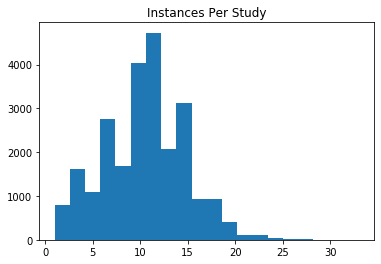

In [29]:
plt.title("Instances Per Study")
plt.hist(instance_counts_per_study.values, N_BINS);

### What is the distribution of counts of frames per instance?

In [30]:
frame_counts_per_instance = measgraphref_df.groupby(["instanceidk"]).count()['row_id']
len(frame_counts_per_instance)

254168

In [31]:
frame_counts_per_instance.head()

instanceidk
1000006    3
1000009    4
1000011    1
1000012    1
1000031    8
Name: row_id, dtype: int64

In [32]:
frame_counts_per_instance.describe()

count    254168.000000
mean          3.241647
std           2.723065
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          27.000000
Name: row_id, dtype: float64

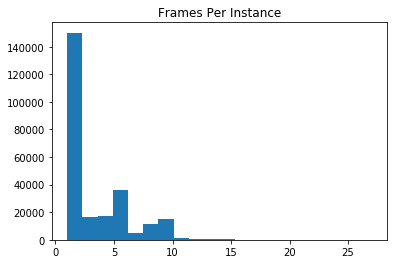

In [33]:
plt.title("Frames Per Instance")
plt.hist(frame_counts_per_instance.values, N_BINS);

### What is the distribution of counts of measurements per frame?

In [34]:
measgraphref_df.head()

,row_id,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,1.0,2882.0,187.0,0.0,57164,0.0,28.242271,0.0,,,
1,2.0,2882.0,188.0,0.0,57164,0.0,7.897812,0.0,,,
2,3.0,2882.0,189.0,0.0,57164,0.0,85.725750,0.0,,,
3,4.0,2882.0,190.0,0.0,57164,0.0,87.190031,0.0,,,
4,5.0,2882.0,191.0,0.0,57164,1.0,36.654466,0.0,,,


In [35]:
measurement_counts_per_frame = measgraphref_df.groupby(["instanceidk", "indexinmglist"]).count()['row_id']
len(measurement_counts_per_frame)

486918

In [36]:
measurement_counts_per_frame.head()

instanceidk  indexinmglist
1000006      0.0              1
             1.0              1
             2.0              1
1000009      0.0              1
             1.0              1
Name: row_id, dtype: int64

In [37]:
measurement_counts_per_frame.describe()

count    486918.000000
mean          1.692119
std           1.044758
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          21.000000
Name: row_id, dtype: float64

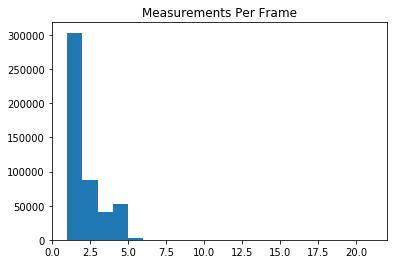

In [38]:
plt.title("Measurements Per Frame")
plt.hist(measurement_counts_per_frame.values, N_BINS);

# 3. View groundtruth from measurements

* Is PLAX: 27,838
* Maybe PLAX: 26,014
* Is A4C: 38,880
* Is A2C: 20,908

In [39]:
# TODO: change table data types to avoid this?
measgraphref_df['instanceidk'] = measgraphref_df['instanceidk'].astype(np.float64)

In [40]:
measgraphref_df.head()

,row_id,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,1.0,2882.0,187.0,0.0,57164.0,0.0,28.242271,0.0,,,
1,2.0,2882.0,188.0,0.0,57164.0,0.0,7.897812,0.0,,,
2,3.0,2882.0,189.0,0.0,57164.0,0.0,85.725750,0.0,,,
3,4.0,2882.0,190.0,0.0,57164.0,0.0,87.190031,0.0,,,
4,5.0,2882.0,191.0,0.0,57164.0,1.0,36.654466,0.0,,,


In [41]:
measgraphref_df = measgraphref_df[['studyidk', 'measabstractnumber', 'instanceidk', 'indexinmglist']]
measgraphref_df.head()

,studyidk,measabstractnumber,instanceidk,indexinmglist
0,2882.0,187.0,57164.0,0.0
1,2882.0,188.0,57164.0,0.0
2,2882.0,189.0,57164.0,0.0
3,2882.0,190.0,57164.0,0.0
4,2882.0,191.0,57164.0,1.0


In [42]:
measgraphic_df.head()

,row_id,instanceidk,indexinmglist,frame,graphictoolidk,longaxisindex,measidk,loopidk,instancerecordtype
0,1.0,57160.0,0.0,0.0,1.0,-1.0,0.0,0.0,False
1,2.0,57160.0,1.0,0.0,2.0,-1.0,0.0,0.0,False
2,3.0,57160.0,2.0,0.0,1.0,-1.0,0.0,0.0,False
3,4.0,57160.0,3.0,0.0,2.0,-1.0,0.0,0.0,False
4,5.0,57162.0,0.0,5.0,2.0,-1.0,0.0,0.0,False


In [43]:
measgraphic_df = measgraphic_df[['instanceidk', 'indexinmglist', 'frame']]
measgraphic_df.head()

,instanceidk,indexinmglist,frame
0,57160.0,0.0,0.0
1,57160.0,1.0,0.0
2,57160.0,2.0,0.0
3,57160.0,3.0,0.0
4,57162.0,0.0,5.0


In [44]:
merge_df = measgraphref_df.merge(measgraphic_df, on=['instanceidk', 'indexinmglist'])
print(merge_df.shape)
merge_df.head()

(823833, 5)


,studyidk,measabstractnumber,instanceidk,indexinmglist,frame
0,2882.0,187.0,57164.0,0.0,8.0
1,2882.0,188.0,57164.0,0.0,8.0
2,2882.0,189.0,57164.0,0.0,8.0
3,2882.0,190.0,57164.0,0.0,8.0
4,2882.0,191.0,57164.0,1.0,15.0


In [45]:
measurement_abstract_rpt_df.head()

,row_id,studyid,measabstractnumber,name,value,unitname
0,1.0,2882.0,2.0,(P1/2t)AVM,2.491754,cm2
1,2.0,2882.0,12.0,Area TSVI,3.606348,cm2
2,3.0,2882.0,43.0,FE(el-ps4),37.032087,%
3,4.0,2882.0,46.0,FE(MDD-ps4),35.095355,%
4,5.0,2882.0,125.0,P1/2t VM,88.291224,ms


In [46]:
measurement_abstract_rpt_df = measurement_abstract_rpt_df[['studyid', 'measabstractnumber', 'name']]
measurement_abstract_rpt_df.head()

,studyid,measabstractnumber,name
0,2882.0,2.0,(P1/2t)AVM
1,2882.0,12.0,Area TSVI
2,2882.0,43.0,FE(el-ps4)
3,2882.0,46.0,FE(MDD-ps4)
4,2882.0,125.0,P1/2t VM


In [47]:
merge_df = merge_df.merge(measurement_abstract_rpt_df, left_on=['studyidk', 'measabstractnumber'], right_on=['studyid', 'measabstractnumber'])
print(merge_df.shape)
merge_df.head()

(823832, 7)


,studyidk,measabstractnumber,instanceidk,indexinmglist,frame,studyid,name
0,2882.0,187.0,57164.0,0.0,8.0,2882.0,AVIts ap4
1,2882.0,188.0,57164.0,0.0,8.0,2882.0,DVIts ap4
2,2882.0,189.0,57164.0,0.0,8.0,2882.0,VTS(el-ps4)
3,2882.0,190.0,57164.0,0.0,8.0,2882.0,VTS(MDD-ps4)
4,2882.0,191.0,57164.0,1.0,15.0,2882.0,AVItd ap4


In [48]:
merge_df['name'] = merge_df['name'].str.strip()

In [49]:
MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW = ['Diám raíz Ao', 'Diám. Ao asc.', 'Diám TSVI', 'Dimensión AI']
POTENTIAL_MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW = ['Diám TSVD', 'DVItd', 'DVIts', 'SIVtd', 'PPVItd']
MEASUREMENTS_APICAL_4_CHAMBER_VIEW = ['AVItd ap4', 'VTD(el-ps4)', 'VTD(MDD-ps4)', 'VTD 4C', 'AVIts ap4', 'VTS(el-ps4)', 'VTS(MDD-ps4)', 'VTS 4C', 'Vol. AI (MOD-sp4)']
MEASUREMENTS_APICAL_2_CHAMBER_VIEW = ['AVItd ap2', 'VTD(el-ps2)', 'VTD(MDD-ps2)', 'VTD 2C', 'AVIts ap2', 'VTS(el-ps2)', 'VTS(MDD-ps2)', 'VTS 2C', 'Vol. AI (MOD-sp2)']
ALL_MEASUREMENTS = MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW + POTENTIAL_MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW + MEASUREMENTS_APICAL_4_CHAMBER_VIEW + MEASUREMENTS_APICAL_2_CHAMBER_VIEW

In [50]:
filter_df = merge_df[merge_df.name.isin(ALL_MEASUREMENTS)].copy()
print(filter_df.shape)
filter_df.head()

(295962, 7)


,studyidk,measabstractnumber,instanceidk,indexinmglist,frame,studyid,name
0,2882.0,187.0,57164.0,0.0,8.0,2882.0,AVIts ap4
2,2882.0,189.0,57164.0,0.0,8.0,2882.0,VTS(el-ps4)
3,2882.0,190.0,57164.0,0.0,8.0,2882.0,VTS(MDD-ps4)
4,2882.0,191.0,57164.0,1.0,15.0,2882.0,AVItd ap4
6,2882.0,193.0,57164.0,1.0,15.0,2882.0,VTD(el-ps4)


In [51]:
filtered_measurements = filter_df['name']
filtered_measurements.value_counts()

DVItd                21102
SIVtd                21007
PPVItd               20776
AVItd ap4            17215
VTD(el-ps4)          17214
VTD(MDD-ps4)         17213
AVIts ap4            16778
VTS(el-ps4)          16777
VTS(MDD-ps4)         16776
Diám raíz Ao         15916
Dimensión AI         13149
Vol. AI (MOD-sp4)    12255
DVIts                11594
AVItd ap2             9370
VTD(el-ps2)           9369
VTD(MDD-ps2)          9368
AVIts ap2             9238
VTS(el-ps2)           9237
VTS(MDD-ps2)          9236
Vol. AI (MOD-sp2)     7625
Diám TSVI             6899
Diám. Ao asc.         5078
Diám TSVD             2559
VTD 4C                  55
VTS 2C                  53
VTD 2C                  52
VTS 4C                  51
Name: name, dtype: int64

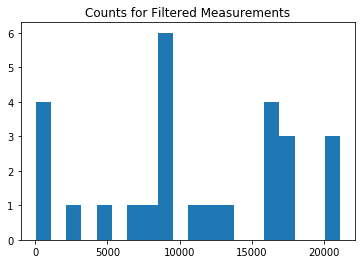

In [52]:
plt.title("Counts for Filtered Measurements")
plt.hist(filtered_measurements.value_counts().values, N_BINS);

In [53]:
filter_df['is_plax'] = filter_df['name'].isin(MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW)
filter_df['maybe_plax'] = filter_df['name'].isin(POTENTIAL_MEASUREMENTS_PARASTERNAL_LONG_AXIS_VIEW)
filter_df['is_a4c'] = filter_df['name'].isin(MEASUREMENTS_APICAL_4_CHAMBER_VIEW)
filter_df['is_a2c'] = filter_df['name'].isin(MEASUREMENTS_APICAL_2_CHAMBER_VIEW)

In [54]:
filter_df['view_count'] = (filter_df['is_plax'] | filter_df['maybe_plax']).astype(int)
filter_df['view_count'] += filter_df['is_a4c'].astype(int) + filter_df['is_a2c'].astype(int)

In [55]:
(filter_df['view_count'] > 1).sum()

0

In [56]:
group_df = filter_df.groupby(['instanceidk', 'frame']).first()
group_df = group_df.drop(['measabstractnumber', 'name'], axis='columns')
print(group_df.shape)
group_df.head()

(113640, 8)


studyidk  indexinmglist  studyid  is_plax  maybe_plax  \
instanceidk frame                                                          
57162.0     5.0      2882.0            0.0   2882.0     True       False   
57164.0     8.0      2882.0            0.0   2882.0    False       False   
            15.0     2882.0            1.0   2882.0    False       False   
57571.0     0.0      2915.0            0.0   2915.0    False        True   
58204.0     18.0     2966.0            0.0   2966.0     True       False   

                   is_a4c  is_a2c  view_count  
instanceidk frame                              
57162.0     5.0     False   False           1  
57164.0     8.0      True   False           1  
            15.0     True   False           1  
57571.0     0.0     False   False           1  
58204.0     18.0    False   False           1

In [57]:
group_df['is_plax'].sum()

27838

In [58]:
group_df['maybe_plax'].sum()

26014

In [59]:
group_df['is_a4c'].sum()

38880

In [60]:
group_df['is_a2c'].sum()

20908